# Song of Insects

The goal of this analysis is to decide if there is a relationship between the sounds ("songs") produced by crickets and the temperature of the soil. To analyze this hypothesis, a dataset describing the behaviour of two crickets is provided. 

## 1. Data Description

The data set contains 20 observations, each having measurements for the soil temperature (degrees F) and the number of pulses per second detected when examining one of the crickets, along with an identifier specifying the examined cricket. The possible identifiers are 'R' and 'B', which shall be used going forward to refer to a specific cricket.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
import numpy as np

data = pd.read_csv('data.csv')

In [2]:
data

,Cricket,Pulses,Temperature
0,B,15.70,71.6
1,B,15.00,73.5
2,R,20.00,88.6
3,R,16.00,71.6
4,R,19.80,93.3
5,R,18.40,84.3
6,R,17.10,80.6
7,B,18.40,96.8
8,B,19.20,89.6
9,B,15.20,79.7


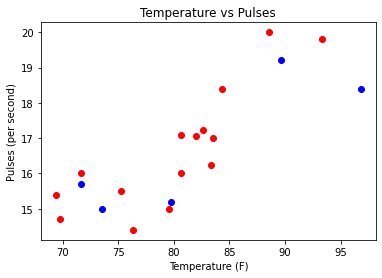

In [3]:
plt.plot(data[data['Cricket'] == 'R']['Temperature'], data[data['Cricket'] == 'R']['Pulses'], 'ro')
plt.plot(data[data['Cricket'] == 'B']['Temperature'], data[data['Cricket'] == 'B']['Pulses'], 'bo')

plt.ylabel('Pulses (per second)')
plt.xlabel('Temperature (F)')

plt.title("Temperature vs Pulses")
plt.show()

Based on observations of the data distributions, shown in the scatter plot, we can assume that there is no meaningful between the two individual crickets 'R' and 'B' and that they have the same distribution over temperature
and the number of pulses.

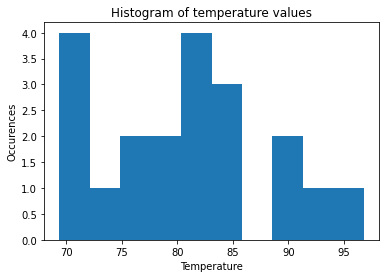

In [4]:
plt.hist(data['Temperature'])

plt.xlabel('Temperature')
plt.ylabel('Occurences')

plt.title("Histogram of temperature values")

plt.show()

In [5]:
print(f"Minimum temperature: {data['Temperature'].min()}")
print(f"Maximum temperature: {data['Temperature'].max()}")

Minimum temperature: 69.4
Maximum temperature: 96.8


The temperature values are bounded by the range 69.4-96.8, which gives the a baseline accuracy interval for the analysis. The temperature values seem uniformly spread, but since there is not a lot of data, we can't make any further assumptions. However, that's good enough to continue the analysis.

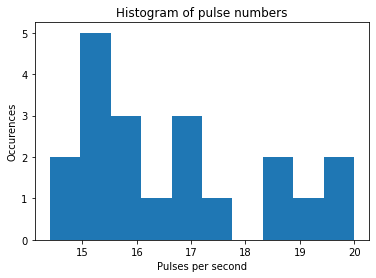

In [6]:
plt.hist(data['Pulses'])

plt.ylabel('Occurences')
plt.xlabel('Pulses per second')

plt.title("Histogram of pulse numbers")

plt.show()

# 2. Correlation and linear regression

In [7]:
print("Correlation", data.corr(), sep='\n')

Correlation
               Pulses  Temperature
Pulses       1.000000     0.829501
Temperature  0.829501     1.000000


What attracts attention straight away is the relatively high value of Pearson's correlation coefficient (0.82). 

This indicates that the temperature and number of pulses are strongly linearly correlated, so the variables have the tendency of being simultaneously smaller or greater than their respective means. 

Even more, this strong correlation implies that linear regression can be used as a predictive model for the observed data set. Therefore, the next step is to model this relationship by using a regression model, fit using the least squares approach. In this case, 
the goal would be to forecast the number of cricket pulses per second, given the temperature of the soil.

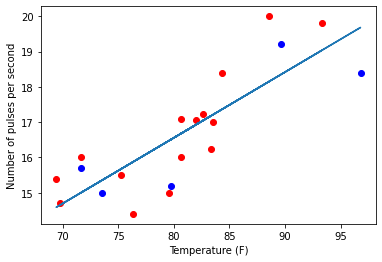

In [8]:
plt.plot(data[data['Cricket'] == 'R']['Temperature'], data[data['Cricket'] == 'R']['Pulses'], 'ro')
plt.plot(data[data['Cricket'] == 'B']['Temperature'], data[data['Cricket'] == 'B']['Pulses'], 'bo')

plt.ylabel('Number of pulses per second')
plt.xlabel('Temperature (F)')

X = np.column_stack((np.ones(len(data['Temperature'])).T, data['Temperature']))
t = data['Pulses']

w = np.linalg.inv(X.T @ X) @ X.T @ t
y = [w.T @ x for x in X]

plt.plot(data['Temperature'], y)

plt.show()

In [9]:
print(f"Pulses prediction for a temperature of 90F: {w.T @ (1, 90)}")

Pulses prediction for a temperature of 90F: 18.417638556365684


For example, the model will predict that for a temperature of 90F, the crickets will make on average around 18.4 pulses per second.

In [10]:
mae = 0
residual_sum, total_sum = 0, 0

for _, row in data.iterrows():
    residual_sum += (w.T @ (1, row['Temperature']) - row['Pulses'])  ** 2
    total_sum += (row['Pulses'] - data['Pulses'].mean()) ** 2
    
    mae += abs(row['Pulses'] - w.T @ (1, row['Temperature']))
    
R_squared = 1 - residual_sum / total_sum
mae = 1 / len(data)

print(f"Coefficient of determination: {R_squared}")
print(f"Mean absolute error (MAE): {mae}")

Coefficient of determination: 0.6880721804524228
Mean absolute error (MAE): 0.05


With a coefficient of determination $R^2$ of 0.688, the model seems to fit the data quite well. The MAE of 0.05 shows that on average, a prediction will have an error of about 0.05 pulses per second. 

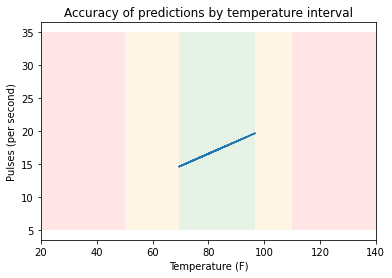

In [13]:
plt.ylabel('Pulses (per second)')
plt.xlabel('Temperature (F)')
plt.title('Accuracy of predictions by temperature interval')

plt.xlim(20, 140)
rect = matplotlib.patches.Rectangle((20, 5), 30, 30, 
                        alpha=0.1,
                        facecolor="red")
plt.gca().add_patch(rect)

rect = matplotlib.patches.Rectangle((50, 5), 19.4, 30, 
                        alpha=0.1,
                        facecolor="orange")
plt.gca().add_patch(rect)

rect = matplotlib.patches.Rectangle((69.4, 5), 27.4, 30, 
                        alpha=0.1,
                        facecolor="green")
plt.gca().add_patch(rect)

rect = matplotlib.patches.Rectangle((96.8, 5), 13.2, 30, 
                        alpha=0.1,
                        facecolor="orange")
plt.gca().add_patch(rect)

rect = matplotlib.patches.Rectangle((110, 5), 30, 30, 
                        alpha=0.1,
                        facecolor="red")
plt.gca().add_patch(rect)

plt.plot(data['Temperature'], y)

plt.show()

The $R^2$ and the MAE measurements show that the linear regression model fits quite well for the data set, so values predicted by interpolating should be fairly accurate.
However, since crickets are alive/sing only when the temperature is in the range of approximately 50-110F, extrapolating values is dangerous. In the plot above we split the temperature intervals into 3 categories:
- Green: The predictions are made by interpolating the values given in the data set.
- Yellow: Predictions are made by extrapolating, but in the 50-110F interval. Therefore, since the crickets are still alive/sing in this interval, predictions should not be entirely unreasonable.
- Red: Predictions are made by extrapolating, outside the alive/singing interval. Predictions there will most likely be entirely false. Since the crickets are dead/don't sing, the number of pulses should be 0, but from the nature of the linear relationship, the predicted values will at some point become negative or very high.

In [12]:
print(f"Coefficients of the linear relationship: {w}")

Coefficients of the linear relationship: [1.67880008 0.18598709]


Also, the linear regression weights give an interesting practical result. It seems that the number of pulses per second is given by the linear relationship 

$$\text{Pulses per second} = 1.678 + 0.18 * \text{Temperature}$$ 

One can then observe that after an increase/decrease of temperature by around 6 degrees, around one pulse per second increase/decrease is expected.